In [28]:
# Load dataset
import pandas as pd
data = pd.read_csv(r"C:\Users\adeel\Downloads\city_day.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [2]:
# Data Preprocessing - Check for missing values
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [29]:
# Delete rows with missing data
data.dropna(axis = 0, inplace = True)

In [4]:
# Confirm deletion
data.isnull().sum().sum()

np.int64(0)

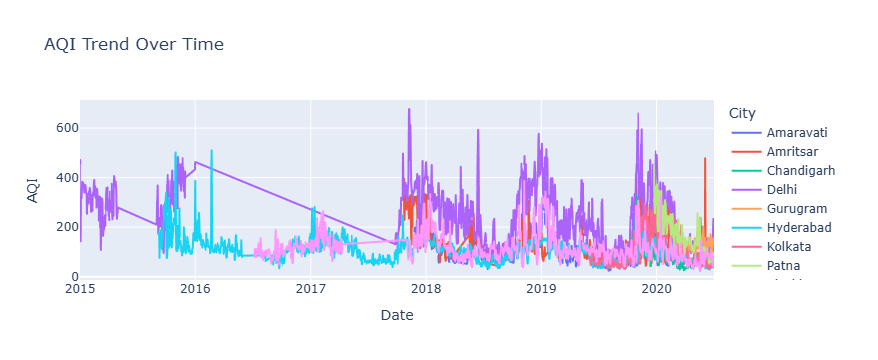

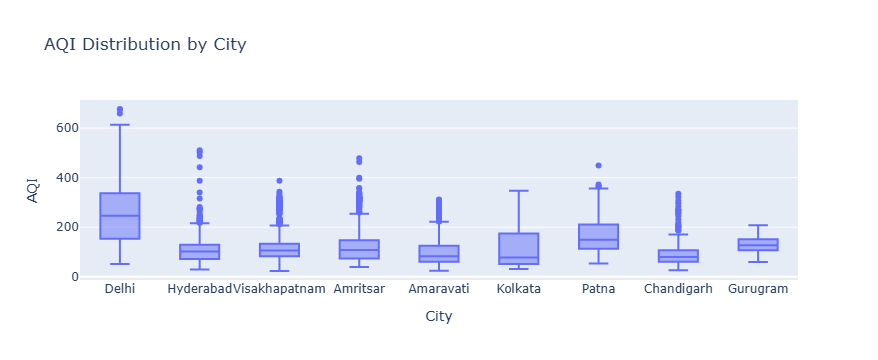

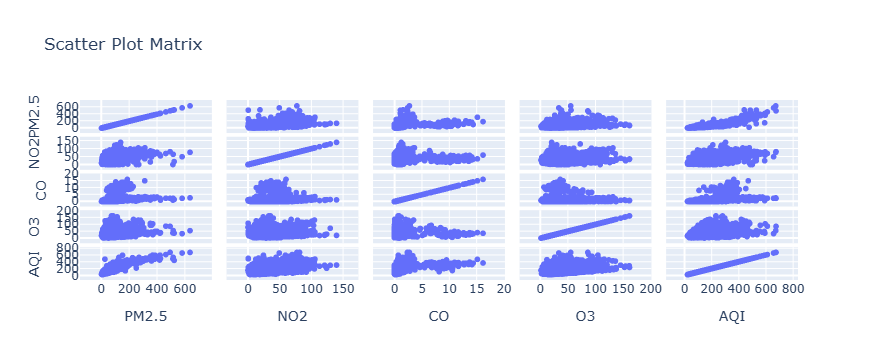

In [5]:
# Exploratory Data Analysis 
import plotly.express as px

# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# AQI Trend Over Time
fig1 = px.line(data, x = 'Date', y = 'AQI', color = 'City', title = 'AQI Trend Over Time')
fig1.show()

# AQI Distribution by City
fig2 = px.box(data, x = 'City', y = 'AQI', title = 'AQI Distribution by City')
fig2.update_layout(xaxis={'categoryorder':'total descending'})
fig2.show()

# Scatter Plot Matrix for selected features
selected_features = ['PM2.5', 'NO2', 'CO', 'O3', 'AQI']
fig3 = px.scatter_matrix(data[selected_features], title = 'Scatter Plot Matrix')
fig3.show()

In [30]:
# Splitting the dataset into features (X) and target (y)
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feature_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
X = data[feature_columns]
y = data['AQI']

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
# Defining and compiling the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Training the model
history = model.fit(X_train_scaled, y_train, epochs = 150, batch_size = 32, validation_split = 0.2)

Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25186.8906 - val_loss: 17613.7285
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8332.9912 - val_loss: 4695.2515
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3523.9182 - val_loss: 2871.7820
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2304.3718 - val_loss: 1906.5887
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1680.5732 - val_loss: 1417.5580
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1357.3328 - val_loss: 1152.5894
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1177.1453 - val_loss: 1008.9286
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1067.6841 - val_loss: 931.0223
Epoch 9/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1001.0259 - val_loss: 863.2515
Epoch 10/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 939.8524 - val_loss: 830.8046
Epoch 11/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 912.1152 

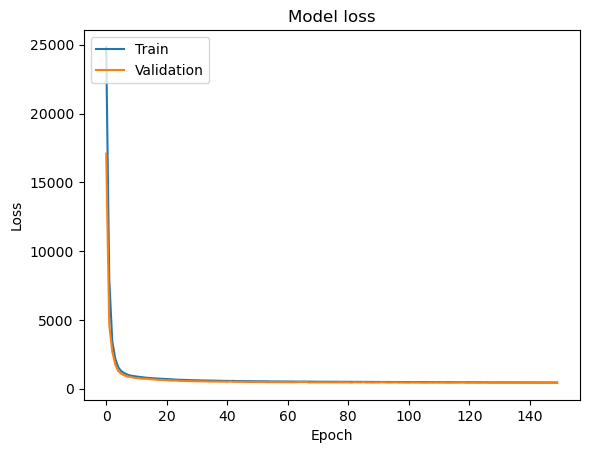

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 450.0192 
Mean Squared Error on Test Data: 450.01922607421875


In [15]:
# Model Evaluation
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Data:", loss)

In [34]:
# Predicting user input
user_input = pd.DataFrame({
    'PM2.5': [81],
    'PM10': [124],
    'NO': [1.44],
    'NO2': [20],
    'NOx': [12],
    'NH3': [10],
    'CO': [0.1],
    'SO2': [15],
    'O3': [127],
    'Benzene': [0.20],
    'Toluene': [6],
    'Xylene': [0.06]
})

user_input_scaled = scaler.transform(user_input)

user_pred = model.predict(user_input_scaled)

print(f"Predicted AQI: {user_pred[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted AQI: 191.96334838867188
